In [1]:
import networkx as nx
%matplotlib inline

In [2]:
M=nx.read_gml("polblogs.gml")

In [25]:
M

In [33]:
nx.info(M)

'Name: \nType: DiGraph\nNumber of nodes: 1490\nNumber of edges: 19016\nAverage in degree:  12.7624\nAverage out degree:  12.7624'

In [3]:
# create weighted graph from M
G = nx.Graph()
for u,v,data in M.edges_iter(data=True):
    if G.has_edge(u,v):
        G[u][v]['weight'] += 1
    else:
        G.add_edge(u, v, weight=1)



In [32]:
G

In [27]:
nx.info(G)

'Name: \nType: Graph\nNumber of nodes: 1224\nNumber of edges: 16711\nAverage degree:  27.3056'

### 1.  Create a nice looking graph of the political blog network

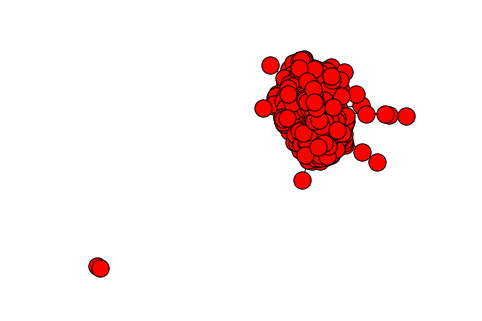

In [4]:
nx.draw(G)

### 2.  What are the 10 most influential blogs?

In [5]:
centrality = nx.eigenvector_centrality_numpy(G)

In [20]:
import operator
influential = sorted(centrality.items(), key=operator.itemgetter(1), reverse=True)
most_influential = influential[:10]
least_influential = influential[-10:]

In [21]:
print '{0:30} {1}'.format('Blog', 'Influence')
print '-----------------------------  --------------'
for item in most_influential:
    print '{0:30} {1}'.format(item[0], item[1])

Blog                           Influence
-----------------------------  --------------
atrios.blogspot.com            0.194822958989
dailykos.com                   0.160907163858
washingtonmonthly.com          0.146540504638
digbysblog.blogspot.com        0.14265582252
bodyandsoul.typepad.com        0.141148535313
liberaloasis.com               0.139537856667
tbogg.blogspot.com             0.137048575355
corrente.blogspot.com          0.129430731342
talkingpointsmemo.com          0.127009310783
dneiwert.blogspot.com          0.122387039006


### 3.  What are the 10 least influential blogs?



In [24]:
print '{0:41} {1}'.format('Blog', 'Influence')
print '----------------------------------------  --------------'
for item in least_influential:
    print '{0:41} {1}'.format(item[0], item[1])

Blog                                      Influence
----------------------------------------  --------------
thingsasitis.net                          1.17370286266e-05
massachusetts-liberal.com                 9.48471174661e-06
quimundus.squarespace.com                 6.05649748744e-06
democratvoice.org                         1.02216023172e-06
batr.net                                  6.79505320439e-07
batr.org/commentary.html                  6.79424545479e-07
quimundus.modblog.com                     6.67572534484e-08
americanworldview.tripod.com/weltansblog  7.48979240759e-09
thelonedem.com                            4.70062057807e-19
digital-democrat.blogspot.com             -1.40068973546e-19


### 4.  Answer this question for both left wing and right wing blogs seperately.  (Optional 10 Extra Credit Points)